In [10]:
import numpy as np
import os
import gzip
import shutil
import logging
import urllib.request, urllib.parse, urllib.error
from urllib.error import URLError, HTTPError

#data opening (For MNIST-format files; used an Intel-Processor, may affect byte-ordering --> modify if needed)
def read_mnist_files(datapath, padding=True):
    
    # download data set (if needed) (does not work yet --> you need to have the datasets downloaded)
    """
    if not os.path.exists(datapath):
        download = input(
            '' + datapath + ' does not exist. ' +
            'Should MNIST data be downloaded to that location? [y/N]')

        success = False
        if download == 'y':
            
            logging.info('Downloading data...')
            url = 'http://yann.lecun.com/exdb/mnist/' + str(datapath.split('\\')[-1]) + '.gz'
            
            folder = os.path.dirname(os.path.abspath(datapath))
            
            try:
                urllib.request.urlretrieve(url, folder)
                logging.info("Done.")
            except HTTPError as e:
                logging.error("HTTP Error:", e.code, url)
                return False
            except URLError as e:
                logging.error("URL Error:", e.reason, url)
                return False
            
            with gzip.open(datapath + '.gz', 'rb') as f_in:
                with open(datapath, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            
            success = True

        if not success:
            logging.info('Aborting.')
            sys.exit()
    """
    
    with open(datapath, 'rb') as f:
        mn = f.read(4)
        if (int.from_bytes(mn, byteorder='big') == 2051):
            #images file
            count_images = int.from_bytes(f.read(4), byteorder='big')
            count_rows = int.from_bytes(f.read(4), byteorder='big')
            count_cols = int.from_bytes(f.read(4), byteorder='big')

            images = np.frombuffer(f.read(count_images*count_rows * count_cols), dtype=np.uint8)
            images = images.reshape((count_images, count_rows, count_cols))
            
            #for learning with a cnn padding may be important
            if (padding == True):
                images = np.pad(images, ((0, 0), (1, 1), (1, 1)), 'constant')
            
            return images

        elif (int.from_bytes(mn, byteorder='big') == 2049):
            #labels file
            count_labels = int.from_bytes(f.read(4), byteorder='big')

            labels = np.frombuffer(f.read(count_labels), dtype=np.uint8)

            return labels
        
        else:
            print('not an MNIST file')

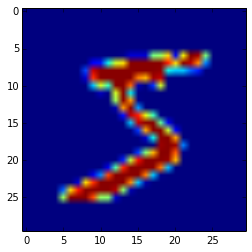

In [12]:
#-----TESTING-----
import matplotlib.pyplot as plt
%matplotlib inline

imgs_train = read_mnist_files('Data/train-images.idx3-ubyte')
labels_train = read_mnist_files('Data/train-labels.idx1-ubyte')

#print(imgs_train[0])
#print(labels_train[0])

plt.figure()
plt.imshow(X=imgs_train[0])